## test parrallel

First version of this document:
- adding in per WFS parallel code. 
- timing that

Second version of this document:
- implementing COrrClock class for inherent timing

In [1]:
# imports
import numpy as np
import pandas as pd
import numpy.ma as ma
import importlib
import matplotlib
from astropy.stats import sigma_clipped_stats
from importlib import reload
import time
from astropy.io import fits
import re

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#personal
from pipeline.est_pipeline import *
from pipeline.code.file_reader import *
from pipeline.code.corr_plots import *
from pipeline.code.cluster import *

import pipeline.code.Estimator as es
import pipeline.code.Estimator_R as er
import pipeline.code.data_table as d_t
import pipeline.code.graph_code as gc

import pipeline.code.Correlator as Cor
from importlib import reload

In [2]:
out_dir = "/home/emcewen/test_lengths/"
data_path = "/home/imaka/data/"

# aocb file:
date = '20210502'
aocb = 'aocb0012o'

# file things
name = f'{date}_{aocb}'
file_path = f'{data_path}{date}/ao/{aocb}.fits'

In [105]:
hdu_list = fits.open(file_path)
hdu_list[0].header["NAXIS2"]

6000

In [4]:
# Quick simulation run
#reload(Cor)
# init object
tmax = 50
curr_data = Cor.Correlator(name, file_path, out_dir, tmax=tmax, s_sub=True, tt_sub=True)

# set the range
#curr_data.set_trange([0, 100])
#check that the slopes are the right length:
x_slopes = curr_data.x_slopes
curr_data.x_slopes.shape

(5, 6000, 8, 8)

In [5]:
## A Real correlation 
#run correlations, save, etc

t0 = time.time()
print("Starting ACor")
curr_data.acor_gen()
t1 = time.time()
print("... Finished in ", str(t1-t0))

curr_data.ccor = False
print("Starting XCor")
curr_data.ccor_gen()
t2 = time.time()
print("... Finished in ", str(t2-t1))

print("Writing Fits File")
curr_data.fits_write()
t3 = time.time()
print("... Finished in ", str(t3-t2))

Starting ACor
... Finished in  18.31304931640625
Starting XCor
... Finished in  59.743571281433105
Writing Fits File
... Finished in  0.05988335609436035


In [6]:
## checking clock variables
curr_data.get_clock_time()

(18.312651872634888, 59.742729902267456)

In [8]:
## a parallel correlation
# restarting
curr_data = Cor.Correlator(name, file_path, out_dir, tmax=tmax, s_sub=True, tt_sub=True)

t0 = time.time()
print("Starting parallel ACor")
curr_data.acor_gen_par()
t1 = time.time()
print("... Finished in ", str(t1-t0))

print("Starting parallel XCor")
curr_data.ccor_gen_par()
t2 = time.time()
print("... Finished in ", str(t2-t1))

print("Writing Fits File")
curr_data.fits_write()
t3 = time.time()
print("... Finished in ", str(t3-t2))

Starting parallel ACor
... Finished in  5.269869565963745
Starting XCor
... Finished in  16.206350564956665
Writing Fits File
... Finished in  0.051407575607299805


In [9]:
## checking clock variables
curr_data.get_clock_time()

(5.268973350524902, 16.20549726486206)

In [10]:
curr_data.fits_file

'/home/emcewen/test_lengths/fits/20210502_aocb0012o_tmax50_tts.fits'

In [11]:
## Testing the pull from a fits file

pull_data = Cor.Correlator("", "", "", f_file=curr_data.fits_file)
pull_data.get_clock_time()

(16.20549726486206, 16.20549726486206)

## Test AOCB length params

In [14]:
## Test AOCB length params
# want to check time on all files in this directory
dir_timer = "/home/emcewen/test_timer/test1/trange/fits/"

files = os.listdir(dir_timer)
tm_data =  [dir_timer + fn for fn in files]

In [17]:
import re
# I'm a dummy and didn't save/pull the trange
for f in files:
    result = re.search('f0_(.*).fits', f)
    print(result.group(1))

15000
20000
10000
1000
100
1000
100
10000
20000
25000
25000
5000
20000
25000
25000
25000
25000
20000
15000
100
20000
100
2000
10000
5000
15000
1000
100
10000
25000
100
5000
10000
2000
20000
15000
10000
100
1000
5000
10000
5000
100
5000
20000
5000
20000
5000
100
15000
25000
20000
100
2000
10000
15000
10000
2000
15000
10000
100
10000
5000
10000
25000
20000
15000
5000
100
100
2000
5000
5000
20000
2000
10000
1000
25000
1000
2000
2000
10000
10000
1000
15000
1000
2000
10000
5000
10000
5000
25000
15000
100
20000
1000
15000
1000
15000
2000
10000
15000
20000
20000
25000
15000
20000
5000
10000
100
2000
25000
2000
100
5000
5000
5000
5000
20000
1000
20000
20000
1000
5000
2000
100
10000
1000
5000
100
100
25000
2000
1000
5000
25000
1000
15000
25000
1000
5000
2000
15000
10000
25000
25000
25000
5000
1000
100
10000
20000
20000
20000
25000
1000
2000
100
20000
10000
25000
2000
20000
25000
10000
2000
10000
25000
100
20000
15000
100
15000
100
10000
15000
2000
25000
25000
10000
10000
25000
20000
20000
15000

In [29]:
# for file in this directory, add trange and tmax

df_times = pd.DataFrame(columns = ['name','tmax','range', 'time0', 'time1'])

for c_f in tm_data:
    pull_data = Cor.Correlator("", "", "", f_file=c_f)
    df_times=df_times.append({'name': pull_data.name,
                              'tmax': pull_data.tmax,
                              'range': re.search('f0_(.*).fits', c_f).group(1),
                              'time0': pull_data.get_clock_time()[0],
                              'time1': pull_data.get_clock_time()[1]},ignore_index=True)


In [88]:
df_times['range'] = df_times['range'].astype(int)
df_times['time1'] = df_times['time1'].astype(int)

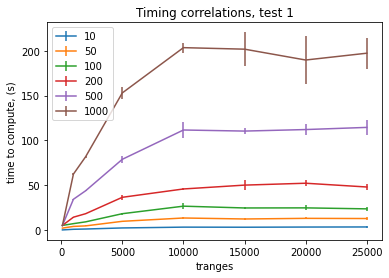

In [112]:
# plotting
ranges = df_times['range'].unique()
tmaxes = df_times['tmax'].unique()
tmaxes.sort()
ranges.sort()

for tmax in tmaxes:
    df_tmp = df_times[df_times['tmax'] == tmax]
    means_tmp = []
    std_tmp = []
    for r in ranges:
        means_tmp.append(df_tmp[df_tmp['range'] == r]['time1'].mean())
        std_tmp.append(df_tmp[df_tmp['range'] == r]['time1'].std())
    plt.errorbar(ranges, means_tmp, yerr=std_tmp, label = tmax)

plt.title("Timing correlations, test 1")
plt.xlabel("tranges")
plt.ylabel("time to compute, (s)")
plt.legend()
#plt.yscale('log')
#plt.xscale('log')
plt.show()

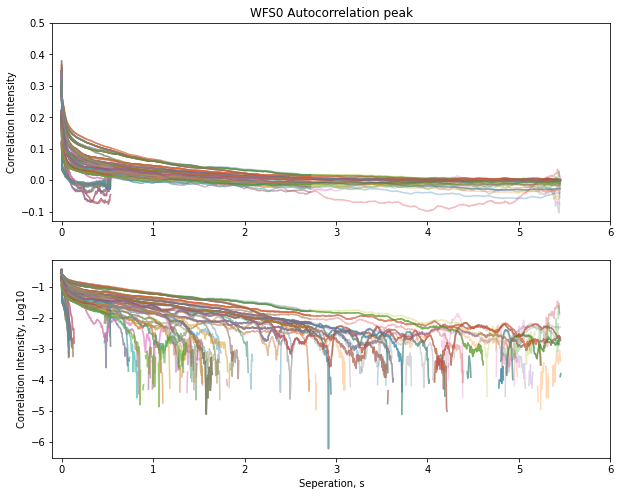

In [116]:
# what do central peaks look like?

fig, ax =  plt.subplots(2,1,figsize=(10,8))
ax[0].set_ylabel('Correlation Intensity')
ax[1].set_ylabel('Correlation Intensity, Log10')
ax[1].set_xlabel('Seperation, s')
ax[0].set_title(f'WFS0 Autocorrelation peak')

# fiding files for this date:
#files_tmp = df_merge[df_merge["DATETIME_tmp"] == d]["outfits_x"]
#f_list = files_tmp.shape[0]

# for each file, pull one wfs, plot on 
#for c, f in enumerate(files_tmp):
for f in tm_data:
    pull_data = Cor.Correlator("", "", "", f_file = f)
    avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
    center_peak_0 = avg_acor[0, :, 7, 7] # takes just WFS 0 peak
    t_coords = np.arange(center_peak_0.shape[0]) # this is the time in frames
    t_coords = t_coords / pull_data.hz_pull()

    ax[0].plot(t_coords, center_peak_0, alpha=0.3)
    # , c=cmap(re.search('f0_(.*).fits', f).group(1)/2500)
    ax[1].plot(t_coords, np.log10(center_peak_0), alpha=0.3)

ax[0].set_ylim(top=0.5)
ax[0].set_xlim(left=-0.1, right=6)
ax[1].set_xlim(left=-0.1, right=6)
plt.show()

### Timing, test 2, switched order

In [106]:
## Test AOCB length params
# want to check time on all files in this directory
dir_timer = "/home/emcewen/test_timer/test2/trange/fits/"

files = os.listdir(dir_timer)
tm_data2 =  [dir_timer + fn for fn in files]

In [107]:
# for file in this directory, add trange and tmax

df_times2 = pd.DataFrame(columns = ['name','tmax','range', 'time0', 'time1'])

for c_f in tm_data2:
    pull_data = Cor.Correlator("", "", "", f_file=c_f)
    df_times2=df_times2.append({'name': pull_data.name,
                              'tmax': pull_data.tmax,
                              'range': re.search('f0_(.*).fits', c_f).group(1),
                              'time0': pull_data.get_clock_time()[0],
                              'time1': pull_data.get_clock_time()[1]},ignore_index=True)


In [108]:
df_times2["range"] = df_times2['range'].astype(int)
df_times2['time1'] = df_times2['time1'].astype(int)
df_times2['tmax'] = df_times2['tmax'].astype(int)

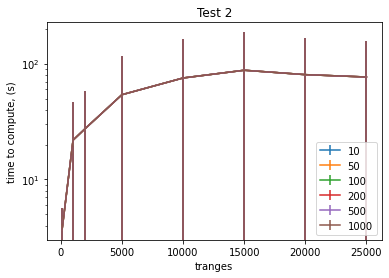

In [111]:
# plotting
ranges = df_times2['range'].unique()
tmaxes = df_times2['tmax'].unique()
tmaxes.sort()
ranges.sort()

for tmax in tmaxes:
    df_tmp = df_times2[df_times2['tmax'] == tmax]
    means_tmp = []
    std_tmp = []
    for r in ranges:
        means_tmp.append(df_times2[df_times2['range'] == r]['time1'].mean())
        std_tmp.append(df_times2[df_times2['range'] == r]['time1'].std())
    plt.errorbar(ranges, means_tmp, yerr=std_tmp, label = tmax)

plt.title("Test 2")
plt.xlabel("tranges")
plt.ylabel("time to compute, (s)")
plt.legend()
plt.yscale('log')

plt.show()

# OLD CODE

## Testing Graphs

In [42]:
curr_data.x_slopes.shape

(4, 5000, 8, 8)

In [37]:
t = np.arange(tmax)
#center_peak_x = curr_data.acor_x[:, :, 7, 7]
#center_peak_y = curr_data.acor_y[:, :, 7, 7]
center_peak_avg = curr_data.avg_acor()[:, :, 7, 7]

p_cmap = cm.get_cmap('Purples', 8)
o_cmap = cm.get_cmap('Oranges', 8)
g_cmap = cm.get_cmap('Greens', 8)

plt.figure(figsize=(10,8))

for i in range(3): 
    c_float = (i+1)/5
    #plt.plot(t, center_peak_x[i][t], label = "Sx WFS" + str(i), linestyle=':', color = p_cmap(c_float))
    #plt.plot(t, center_peak_y[i][t], label = "Sy WFS" + str(i), linestyle=':', color = o_cmap(c_float))
    #plt.plot(t, center_peak_avg[i][t], label = "WFS" + str(i), color = g_cmap(c_float))
    
plt.title('WFS corr peak vs time, X and Y correlations')
plt.ylabel('Intensity')
plt.xlabel('time')
plt.legend(loc = 'upper right')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [ ]:
curr_data.acor_x

In [ ]:
## A Real correlation 

t0 = time.time()
print("Starting ACor")
curr_data.acor_gen()
t1 = time.time()
print("... Finished in ", str(t1-t0))

curr_data.ccor = False
print("Starting XCor")
curr_data.ccor_gen()
t2 = time.time()
print("... Finished in ", str(t2-t1))

print("Writing Fits File")
curr_data.fits_write()
t3 = time.time()
print("... Finished in ", str(t3-t2))

# Pulling Correlated data

In [2]:
p_file = "/home/emcewen/test_lengths/fits/20180601_aocb0040o_tmax2000_stt.fits"
pull_data = Cor.Correlator("", "", "", f_file = p_file)

In [3]:
pull_data.wfs_mag

[None, None, None, None, None]

In [92]:
avg_acor[:, 0, 7, 7]

array([3.29952145e-01, 3.49581541e-01, 2.34205831e-01, 6.51520917e-28,
       2.87199717e-01])

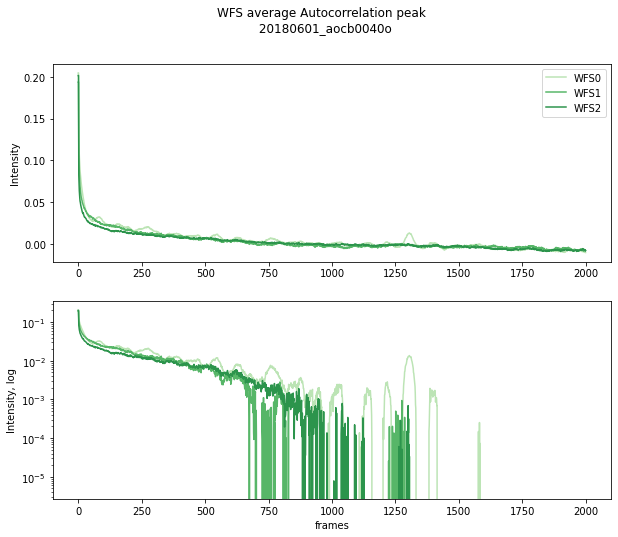

In [59]:
# Creating subplots
t = np.arange(2000)
avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
center_peak_avg = avg_acor[:, :, 7, 7]

c_min = 100
c_max = 500
center_avg = np.average(center_peak_avg[:2], axis=0)
f1, f2 = Linear_fit(t[c_min:c_max], np.log(center_avg)[c_min:c_max])

g_cmap = cm.get_cmap('Greens', 8)
fig,a =  plt.subplots(2,1,figsize=(10,8))

# No log
for i in range(3): 
    c_float = (i+2)/6
    a[0].plot(t, center_peak_avg[i][t], label = "WFS" + str(i), color = g_cmap(c_float))
    a[1].plot(t, center_peak_avg[i][t], label = "WFS" + str(i), color = g_cmap(c_float))

a[1].plot(t, Linear_est(t, f1[0], f1[1]))

a[0].legend(loc = 'upper right')
a[0].set_ylabel('Intensity')
a[1].set_yscale('log')
a[1].set_ylabel('Intensity, log')
a[1].set_xlabel('frames')

fig.suptitle(f'WFS average Autocorrelation peak \n {pull_data.name}')
plt.show()

## Need to add power fits 

In [5]:
# old fitting code:
import scipy.optimize as opt

# Linear Fits
def Linear_tot(x, y):
    a, b = Linear_Fit(x, y)
    a_err, b_err = Linear_err(x, y, a, b)
    return np.array([a, a_err, b, b_err])

def Linear(x, a, b):
    return a * x + b

def Linear_Fit(x, y):
    # returns [slope, intercept]
    # the optimized curve returns the optimized abc values for Gaussian
    # [height, position of peak center (mean), standard deviation]
    popt, pcov = opt.curve_fit(Linear, x, y)
    return popt[0], popt[1]
    
def Linear_fit(x, y):
    # returns fit
    return opt.curve_fit(Linear, x, y)
    
def Linear_est(x, a, b):
    #returns y estimates
    y_est = [Linear(xi, a, b) for xi in x]
    return y_est

#### Ply fit:

def Poly(x, a, b):
    return b*x**a

def Poly_est(x, a, b):
    #returns y estimates
    y_est = [Poly(xi, a, b) for xi in x]
    return y_est

def Poly_fit(x, y):
    # returns [slope, intercept]
    # the optimized curve returns the optimized abc values for Gaussian
    # [height, position of peak center (mean), standard deviation]
    return opt.curve_fit(Poly, x, y)

In [26]:
# mask last wfs
pull_data.active_wfs = [True, True, True, False]
# average, masking on active wfs
center_avg = np.average(center_peak_avg[pull_data.active_wfs], axis=0)

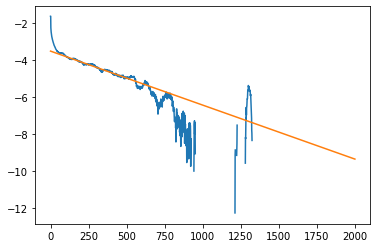

In [39]:
t = np.arange(2001)

c_min = 100
c_max = 500
pull_data.active_wfs = [True, True, True, False]
center_avg = np.average(center_peak_avg[pull_data.active_wfs], axis=0)
f1, f2 = Linear_fit(t[c_min:c_max], np.log(center_avg)[c_min:c_max])

plt.plot(t, np.log(center_avg))
plt.plot(t, Linear_est(t, f1[0], f1[1]))


(array([-2.92139483e-03, -3.49790347e+00]),
 array([[ 4.67440058e-10, -1.39998297e-07],
        [-1.39998297e-07,  4.81619852e-05]]))

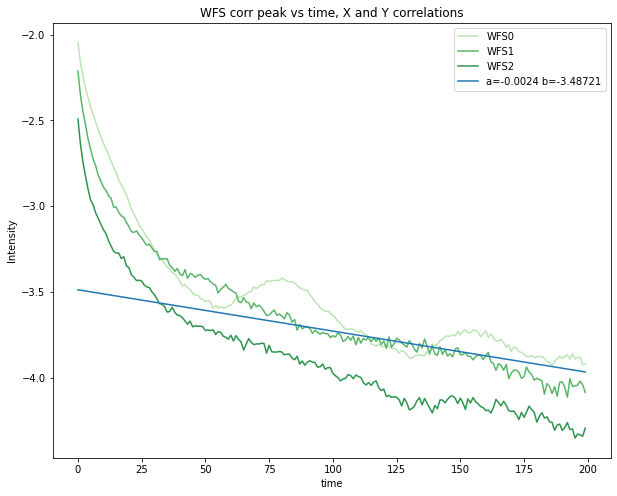

In [53]:
tmax = 200
t = np.arange(tmax)
avg_acor = (pull_data.acor_x + pull_data.acor_y)/2
center_peak_avg = avg_acor[:, 2:, 7, 7]

c_min = 100
c_max = 200
center_avg = np.average(center_peak_avg[:2], axis=0)
f1, f2 = Linear_fit(t[c_min:c_max], np.log(center_avg)[c_min:c_max])

g_cmap = cm.get_cmap('Greens', 8)
plt.figure(figsize=(10,8))

for i in range(3): 
    c_float = (i+2)/6
    plt.plot(t, np.log(center_peak_avg[i][t]), label = "WFS" + str(i), color = g_cmap(c_float))
    
plt.plot(t, Linear_est(t, f1[0], f1[1]), label = f"a={np.around(f1[0],5)} b={np.around(f1[1],5)}")
    

plt.title('WFS corr peak vs time, X and Y correlations')
plt.ylabel('Intensity')
plt.xlabel('time')
plt.legend(loc = 'upper right')

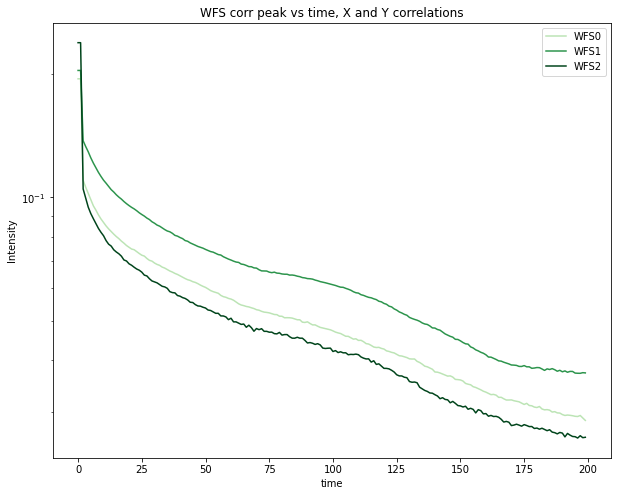

In [56]:
t = np.arange(tmax)

g_cmap = cm.get_cmap('Greens', 8)

plt.figure(figsize=(10,8))

for i in range(3): 
    c_float = (i+1)/3
    #plt.plot(t, center_peak_x[i][t], label = "Sx WFS" + str(i), linestyle=':', color = p_cmap(c_float))
    #plt.plot(t, center_peak_y[i][t], label = "Sy WFS" + str(i), linestyle=':', color = o_cmap(c_float))
    plt.plot(t, center_peak_avg[i][t], label = "WFS" + str(i), color = g_cmap(c_float))
    
plt.title('WFS corr peak vs time, X and Y correlations')
plt.ylabel('Intensity')
plt.xlabel('time')
plt.yscale('log')
plt.legend(loc = 'upper right')